In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
local_path = r'/Users/pablouribepizarro/Desktop/Analisis de Datos/'
datos = pd.read_csv(local_path + 'CitasEspecialidades.csv')
datos

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,CodPrestacion,Prestacion,FechaReserva,FechaCita,EstadoCita,MotivoC,MotivoNA,MotivoS
0,1.211693e+10,2001-06-26,Mujer,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Nueva,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-12-30,2015-01-05,No Atendido,NaN,No se Presentó,NaN
1,1.274585e+10,2005-06-18,Hombre,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-04-03,2015-01-05,Atendido,NaN,NaN,NaN
2,1.248321e+10,2003-10-15,Hombre,Antofagasta,Antofagasta,II Región de Antofagasta,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-05-05,2015-01-05,No Atendido,NaN,No se Presentó,NaN
3,1.153553e+10,1998-02-18,Mujer,San Bernardo,Maipo,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
4,1.135475e+10,1996-06-08,Hombre,Vilcún,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
5,1.157893e+10,1998-12-08,Mujer,Coinco,Cachapoal,VI Región del Libertador General Bernardo O´Hi...,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
6,1.172271e+10,1999-09-02,Mujer,Molina,Curicó,VII Región del Maule,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
7,1.223425e+10,2002-11-03,Mujer,Coihueco,Ñuble,VIII Región del Bío Bío,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
8,1.147429e+10,1997-04-18,Hombre,Peñalolén,Santiago,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-10,2015-01-05,No Atendido,NaN,No se Presentó,NaN
9,1.200020e+10,2000-11-08,Mujer,Freire,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-21,2015-01-05,Atendido,NaN,NaN,NaN


In [16]:
def Anteriores(data):
    return(data.shape[0])   

In [24]:
#Transform Data into Numerical:

datos['FechaNac'] = pd.to_datetime(datos['FechaNac'])
datos['FechaReserva'] = pd.to_datetime(datos['FechaReserva'])
datos['FechaCita'] = pd.to_datetime(datos['FechaCita'])
datos = datos.sort_values('FechaCita')

In [ ]:
#Feature Creation
datos['Edad'] = np.floor((datos['FechaReserva']-datos['FechaNac']).dt.days/365)
datos['DiasReservaCita'] = (datos['FechaCita']-datos['FechaReserva']).dt.days
datos['Reservas Anteriores'] = datos.apply(lambda row: 
                                           ReservasAnteriores(datos.loc[(datos['PAID'] == row['PAID']) 
                                            & (datos['FechaCita'] < row['FechaCita'])]), axis =1 )
datos['Cancelaciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos.loc[(datos['PAID'] == row['PAID']) 
                                            & (datos['FechaCita'] < row['FechaCita'])
                                            &(datos['EstadoCita'] == 'Cancelado')]), axis =1 )
datos['Asistidas Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos.loc[(datos['PAID'] == row['PAID']) 
                                            & (datos['FechaCita'] < row['FechaCita'])
                                            &(datos['EstadoCita'] == 'Atendido')]), axis =1 )
datos['No Asistidas Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos.loc[(datos['PAID'] == row['PAID']) 
                                            & (datos['FechaCita'] < row['FechaCita'])
                                            &(datos['EstadoCita'] == 'No Atendido')]), axis =1 )

In [42]:
datos['Reservas Anteriores'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  28,  29,  30,  31,  32,  33,  34,  27,  35,  37,  39,  40,
        41,  42,  43,  45,  47,  48,  49,  50,  52,  53,  36,  55,  56,
        38,  57,  58,  60,  61,  59,  62,  71,  79,  88,  44,  68,  46,
        74,  94, 102,  83,  85, 105,  97, 109,  51,  64,  54,  65,  69,
        70,  75,  77,  78, 101,  80, 111,  81,  82, 117, 122,  86, 126,
        87, 118,  89,  90,  91, 120, 128, 138,  92,  93, 146,  96, 121,
        98,  99, 153, 167, 100, 186, 195, 148, 103, 157, 199, 106, 165,
       108, 174, 110, 112, 113, 125, 129, 130, 204, 132, 133, 135, 136,
       205, 139, 140, 141, 142, 143, 144, 145, 149, 151, 152, 154,  63,
       155, 156, 158, 159, 160, 162, 163, 168, 169, 170, 171, 172, 173,
       175,  66,  67, 177, 179, 180, 183, 184, 185, 188, 189, 190, 191,
       192, 193, 194, 196, 197,  72, 200, 201, 202,  73])

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


column_list = [] #str columns
for column in datos.columns:
    if datos[column].dtype == 'O':
        column_list.append(column)

datos_num = datos[column_list].astype(str).apply(le.fit_transform)
for column in datos.columns:
    if datos[column].dtype != 'O':
        datos_num[column] = datos[column]

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

0.64280361846933498

In [17]:
clf.feature_importances_

array([ 0.08340837,  0.34685447,  0.0963703 ,  0.06879648,  0.15898036,
        0.10619431,  0.00993819,  0.10269521,  0.02676231])

In [18]:
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion','Edad','DiasReservaCita']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion','Edad','DiasReservaCita']], datos_num['EstadoCita'])

0.85836674469087737

In [19]:
clf.feature_importances_

array([ 0.06494545,  0.19419843,  0.04108933,  0.03183918,  0.03750909,
        0.01747067,  0.00360271,  0.01608573,  0.00411713,  0.24956546,
        0.33957682])

In [20]:
datos.groupby(['EstadoCita']).count()

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,CodPrestacion,Prestacion,FechaReserva,FechaCita,MotivoC,MotivoNA,MotivoS,Edad,DiasReservaCita
EstadoCita,,,,,,,,,,,,,,,,,,,
Agendado,196,196,196,192,181,181,196,196,196,196,196,196,196,196,0,0,44,196,196
Atendido,82196,82196,82196,80832,72545,72406,82196,82196,82196,82193,82196,82196,82196,82196,0,0,11570,82196,82196
Cancelado,24297,24297,24297,23835,21212,21175,24297,24297,24297,24102,24296,24296,24297,24297,23916,0,1890,24297,24297
En Espera,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,7,7
No Atendido,22732,22732,22732,22314,19953,19899,22732,22732,22732,22729,22730,22730,22732,22732,0,22732,1709,22732,22732
Tranferido,19,19,19,19,14,14,19,19,19,19,19,19,19,19,0,0,0,19,19


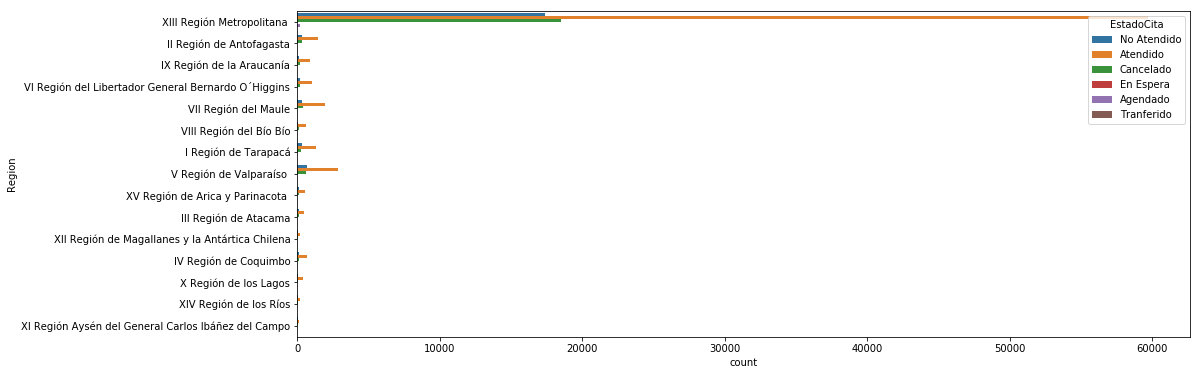

In [21]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(y="Region", hue="EstadoCita", data=datos, orient = "h")


In [30]:
len(datos['PAID'].unique())

125288